#**Undersampling**

Near Miss is an undersampling technique used to handle imbalanced datasets by reducing the number of examples in the majority class. There are three versions of Near Miss:

- NearMiss-1: Selects majority class samples with the smallest average distance to the three closest minority class samples.
- NearMiss-2: Selects majority class samples with the smallest average distance to the three furthest minority class samples.
- NearMiss-3: A more aggressive undersampling approach that selects a predefined number of majority class samples closest to each minority class sample.

Explanation:
- This code first generates a synthetic binary-class dataset with a significant class imbalance using make_classification.
- It then applies the three versions of Near Miss undersampling to the dataset.
- Finally, it plots the original dataset and the results of each Near Miss version to visually demonstrate the effect of each undersampling strategy on the class distribution.

Remember, the effectiveness of each Near Miss version depends on your specific dataset and problem. It's crucial to experiment with different undersampling strategies and evaluate their impact on your model's performance.

Original dataset shape Counter({1: 900, 0: 100})
NearMiss-1 dataset shape Counter({0: 100, 1: 100})
NearMiss-2 dataset shape Counter({0: 100, 1: 100})
NearMiss-3 dataset shape Counter({0: 100, 1: 86})


/usr/local/lib/python3.10/dist-packages/imblearn/under_sampling/_prototype_selection/_nearmiss.py:203: UserWarning: The number of the samples to be selected is larger than the number of samples available. The balancing ratio cannot be ensure and all samples will be returned.
  warnings.warn(


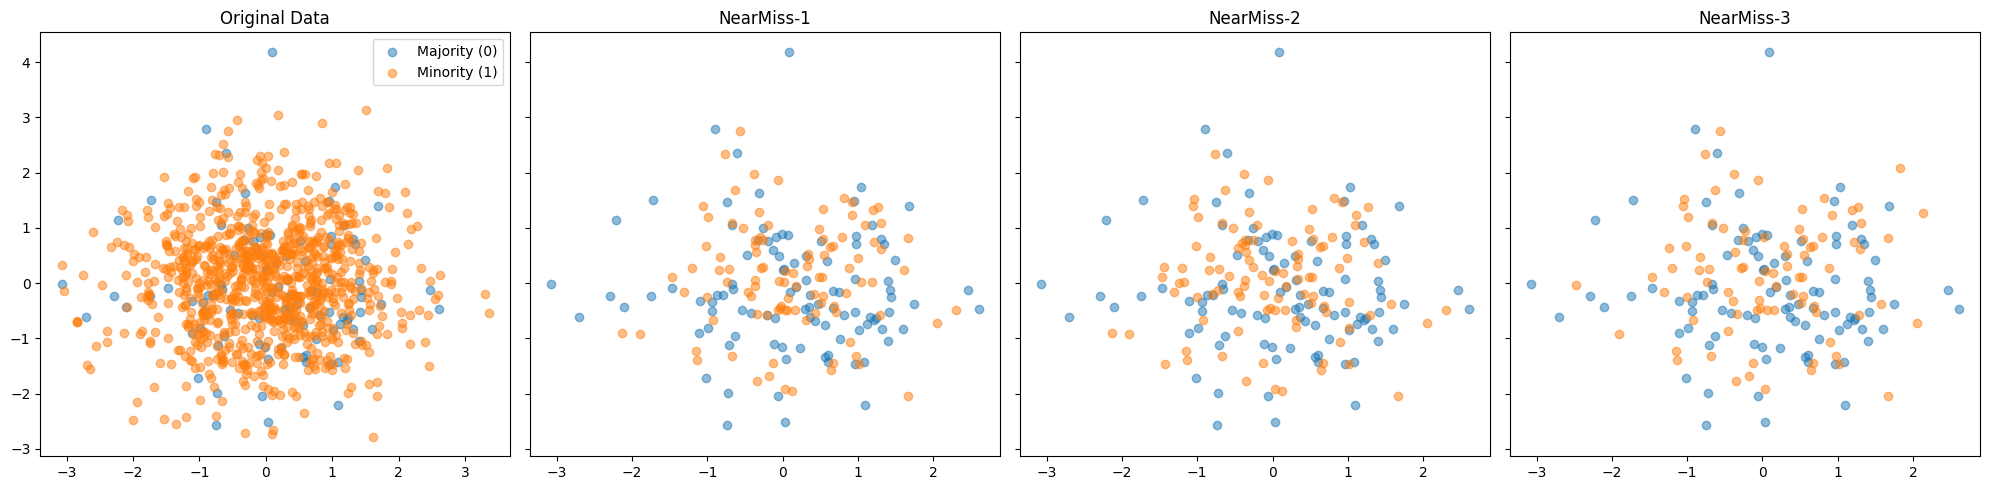

In [ ]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import NearMiss
import matplotlib.pyplot as plt

# Create a synthetic dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=1000, random_state=10)

print(f"Original dataset shape {Counter(y)}")

# Define NearMiss versions
versions = [1, 2, 3]
fig, axs = plt.subplots(1, 4, figsize=(20, 5), sharey=True)
colors = ['#1F77B4', '#FF7F0E']

# Plot original dataset
axs[0].scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Majority (0)", alpha=0.5, edgecolor=colors[0], facecolor=colors[0])
axs[0].scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Minority (1)", alpha=0.5, edgecolor=colors[1], facecolor=colors[1])
axs[0].set_title('Original Data')
axs[0].legend()

# Apply NearMiss and plot
for i, version in enumerate(versions, start=1):
    nm = NearMiss(version=version)
    X_res, y_res = nm.fit_resample(X, y)
    print(f"NearMiss-{version} dataset shape {Counter(y_res)}")

    axs[i].scatter(X_res[y_res == 0][:, 0], X_res[y_res == 0][:, 1], label="Majority (0)", alpha=0.5, edgecolor=colors[0], facecolor=colors[0])
    axs[i].scatter(X_res[y_res == 1][:, 0], X_res[y_res == 1][:, 1], label="Minority (1)", alpha=0.5, edgecolor=colors[1], facecolor=colors[1])
    axs[i].set_title(f'NearMiss-{version}')

plt.tight_layout()
plt.show()
